# Keras introduction, homework 6

## Preload

### Libraries

In [21]:
%tensorflow_version 1.x
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

### Version

In [2]:
print('TF version ', tf.__version__)

TF version  1.15.2


## Excercise 1


Your task is to write a convolutional neural network
which will try to classify handwritten digits

Your neural network should have 8 layers:
1.   input Conv2D layer, with 30 filters (nuerons), kernel size
should be 5x5, activation function ReLu (don’t forget
about a proper input shape)
2.   MaxPooling2D layer, with pool size 2x2
3.   Conv2D layer, with 15 filters (nuerons), kernel size
should be 3x3, activation function ReLu
4.   MaxPooling2D layer, with pool size 2x2
Keras introduction, homework 6
5.   Flatten layer
6.   Dense layer, with 128 neurons and activation function
ReLu
7.   Dense layer, with 50 neurons and activation function
ReLu
8.   output Dense layer, with 10 neurons and activation
function softmax


*   As the loss function, you should use
categorical_crossentropy, the optimizer should be
adam, and the metric should be accuracy
*   Try as many epochs as you can (for example 20, 30)
*   Print images, their labels and neural network predictions
for 2 randomly chosen images from the test set





### Solution

Load data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train_1, y_train_1), (X_test_1, y_test_1) = mnist.load_data()

Reshape to be [samples][width][height][channels]

In [4]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

Normalize inputs from 0-255 to 0-1

In [5]:
X_train = X_train / 255
X_test = X_test / 255

One hot encode outputs

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Define the nn_model

In [7]:
def nn_model():
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

Build the model

In [8]:
model = nn_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



Plot of model

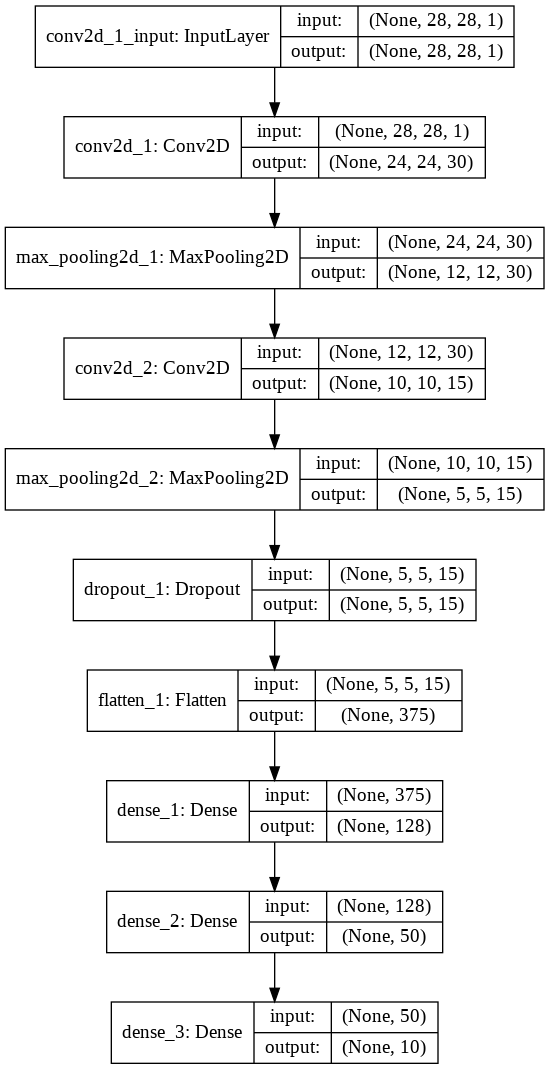

In [22]:
plot_model(model, to_file='plot_of_model.png', show_shapes=True, show_layer_names=True)

Fit the model

In [9]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200)


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 34s 571us/step - loss: 0.4094 - accuracy: 0.8739 - val_loss: 0.0760 - val_accuracy: 0.9772
Epoch 2/30
60000/60000 [==============================] - 34s 569us/step - loss: 0.0969 - accuracy: 0.9707 - val_loss: 0.0504 - val_accuracy: 0.9848
Epoch 3/30
60000/60000 [==============================] - 34s 573us/step - loss: 0.0696 - accuracy: 0.9784 - val_loss: 0.0371 - val_accuracy: 0.9875
Epoch 4/30
60000/60000 [==============================] - 34s 573us/step - loss: 0.0553 - accuracy: 0.9833 - val_loss: 0.0338 - val_accuracy: 0.9891
Epoch 5/30
60000/60000 [==============================] - 40s 661us/step - loss: 0.0480 - accuracy: 0.9854 - val_loss: 0.0324 - val_accuracy: 0.9900
Epoch 6/30
60000/60000 [==============================] - 34s 573us/step - loss: 0.0410 - accuracy: 0.9872 - val_loss: 0.0290 - val_accuracy: 0.9914
Epoch 7/30
60000/60000 [==============================]

Final evaluation of the model

In [10]:
scores = model.evaluate(X_test, y_test, verbose=0)
prediction = model.predict(X_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 0.71%


### Print images, their labels and neural network predictions for 2 randomly chosen images from the test set

Indexes

In [11]:
INDEX_1 = random.randint(0, len(prediction))
INDEX_2 = random.randint(0, len(prediction))

First randomly shosen image


PREDICTION: [2.80651614e-13 1.63139813e-08 4.54588478e-10 9.99968052e-01
 3.09592022e-12 3.18941529e-05 1.10657525e-10 1.80174975e-09
 2.78275264e-10 1.13071941e-09]

Max PREDICTION: 3

Label: 2

Image:



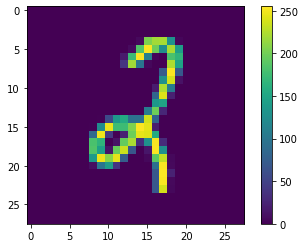

In [26]:
print("\nPREDICTION: " + str(prediction[INDEX_1]))
print("\nMax PREDICTION: " + str(np.argmax(prediction[INDEX_1])))
print("\nLabel: " + str(y_train_1[INDEX_1]))
print("\nImage:\n")

plt.figure()
plt.imshow(X_train_1[INDEX_1])
plt.colorbar()
plt.grid(False)
plt.show()

Second randomly shosen image


PREDICTION: [4.14672172e-08 1.01196825e-07 8.58439398e-06 1.13508850e-02
 1.03958091e-05 5.82135469e-03 9.20865961e-09 5.07206224e-08
 5.15288441e-04 9.82293308e-01]

Max PREDICTION: 9

Label: 6

Image:



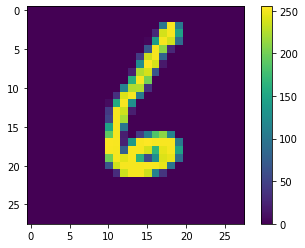

In [25]:
print("\nPREDICTION: " + str(prediction[INDEX_2]))
print("\nMax PREDICTION: " + str(np.argmax(prediction[INDEX_2])))
print("\nLabel: " + str(y_train_1[INDEX_2]))
print("\nImage:\n")

plt.figure
plt.imshow(X_train_1[INDEX_2])
plt.colorbar()
plt.grid(False)
plt.show()

## Prepared by:

Viktor Surzhko